In [1]:
from ultralytics import YOLO
from ultralytics.utils import YAML

import torch
from torch.utils.data import DataLoader
from ultralytics.data.dataset import YOLODataset
import numpy as np
from ultralytics.utils import DEFAULT_CFG
model = YOLO('yolov8n.pt') 
from ultralytics.data.utils import check_cls_dataset, check_det_dataset

# DEFAULT_CFG = YAML.load('default.yaml')

from ultralytics.utils import DEFAULT_CFG
DEFAULT_CFG.imgsz
DEFAULT_CFG.augment = False

In [2]:

file = 'AFDET_dataset.yaml'
# results = model.train(data='AFDET_dataset.yaml', epochs=1, imgsz=250)
data = YAML.load(file)  # dictionary
data


{'path': '/media/kaizen/T7/Project/final_project/Project//Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/',
 'train': 'images/train',
 'val': 'images/val',
 'names': {0: 'paint_peel', 1: 'rivet_damage', 2: 'rust', 3: 'scratch'}}

In [3]:

data = check_det_dataset(file)
data

{'path': PosixPath('/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo'),
 'train': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/train',
 'val': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/val',
 'names': {0: 'paint_peel', 1: 'rivet_damage', 2: 'rust', 3: 'scratch'},
 'yaml_file': 'AFDET_dataset.yaml',
 'nc': 4,
 'channels': 3}

In [4]:

from ultralytics.data import build_dataloader, build_yolo_dataset
# if you use mode 'train' it'll apply unwanted augmentations
dataset = build_yolo_dataset(DEFAULT_CFG, data['train'], 1, data, mode='val' )
dataset[0].keys()
dataset[0]['img'].shape

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3593.4±1203.1 MB/s, size: 30.6 KB)
val: Scanning /media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/labels/train.cache... 344 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 344/344 131.2Mit/s 0.0s


torch.Size([3, 640, 640])

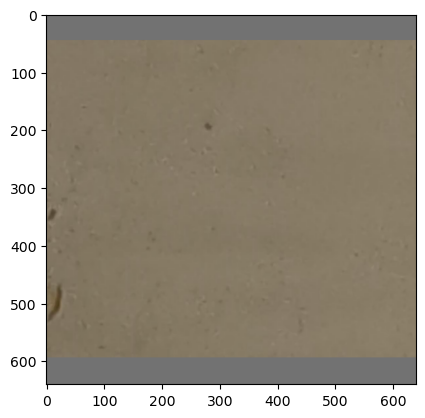

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from PIL import Image
import cv2

sample = dataset[1]

# Get image (convert from tensor if needed)
img = sample['img']
img = img.cpu().numpy().transpose(1, 2, 0)

# Get bounding boxes and classes
bboxes = sample.get('bboxes', [])
cls = sample.get('cls', [])

plt.imshow(img)

# # Display image
# axes[idx].imshow(img)
# axes[idx].set_title(f'Sample {sample_idx}')
# axes[idx].axis('off')

# # Draw bounding boxes (YOLO format: center_x, center_y, width, height normalized)
# h, w = img.shape[:2]
# for bbox, class_id in zip(bboxes, cls):
#     cx, cy, bw, bh = bbox[:4]
#     x1 = int((cx - bw/2) * w)
#     y1 = int((cy - bh/2) * h)
#     x2 = int((cx + bw/2) * w)
#     y2 = int((cy + bh/2) * h)
    
#     rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
#                             linewidth=2, edgecolor='r', facecolor='none')
#     axes[idx].add_patch(rect)
#     axes[idx].text(x1, y1-5, f'Class: {int(class_id)}', 
#                     color='red', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))

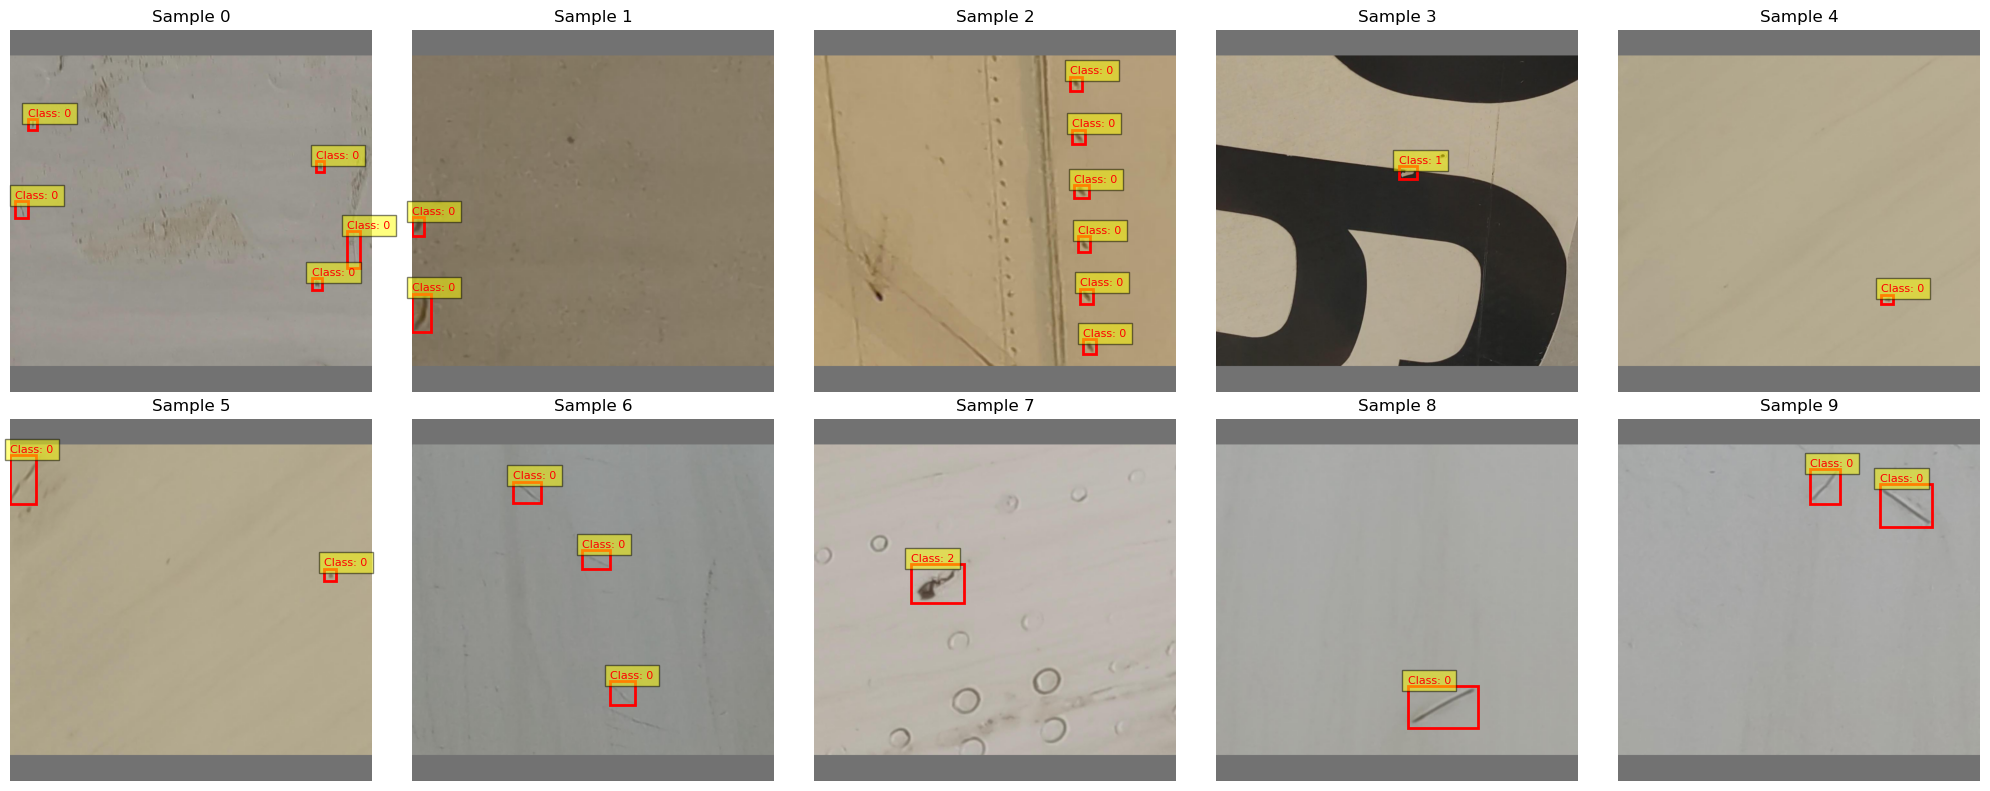

In [6]:
# Get random indices
num_samples = min(10, len(dataset))
# random_indices = random.sample(range(len(dataset)), num_samples)
random_indices = list(range(num_samples))

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, sample_idx in enumerate(random_indices):
    sample = dataset[sample_idx]
    
    # Get image (convert from tensor if needed)
    img = sample['img']
    if isinstance(img, torch.Tensor):
        img = img.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)
    else:
        img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)
    
    # Get bounding boxes and classes
    bboxes = sample.get('bboxes', [])
    cls = sample.get('cls', [])
    
    # Display image
    axes[idx].imshow(img)
    axes[idx].set_title(f'Sample {sample_idx}')
    axes[idx].axis('off')
    
    # Draw bounding boxes (YOLO format: center_x, center_y, width, height normalized)
    h, w = img.shape[:2]
    for bbox, class_id in zip(bboxes, cls):
        cx, cy, bw, bh = bbox[:4]
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                                linewidth=2, edgecolor='r', facecolor='none')
        axes[idx].add_patch(rect)
        axes[idx].text(x1, y1-5, f'Class: {int(class_id)}', 
                      color='red', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()